Import the necessary libraries

In [20]:
#to manipulate dataframes
import pandas as pd

#to manpulate arrays
import numpy as np

#to plot the data
import matplotlib.pyplot as plt

#to split our dataset into training and testing subsets
from sklearn.model_selection import train_test_split

#use the SVC ...
from sklearn.svm import SVC

# ...
from sklearn.metrics import accuracy_score

Load the dataset

In [6]:
iris = pd.read_csv("C:/Users/Mulle/Desktop/AI-mini-project/Iris/IRIS_ Flower_Dataset.csv")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Adding a target column (0 for setosa, 1 for versicolor and 2 for virginica)

In [18]:
target = []

for i in range(len(iris['species'])):
    if iris['species'][i] == "Iris-setosa":
        target.append(0.0)
    elif iris['species'][i] == "Iris-versicolor":
        target.append(1.0)
    else:
        target.append(2.0)


iris['target'] = target

iris

,sepal_length,sepal_width,petal_length,petal_width,species,target
0,5.1,3.5,1.4,0.2,Iris-setosa,0.0
1,4.9,3.0,1.4,0.2,Iris-setosa,0.0
2,4.7,3.2,1.3,0.2,Iris-setosa,0.0
3,4.6,3.1,1.5,0.2,Iris-setosa,0.0
4,5.0,3.6,1.4,0.2,Iris-setosa,0.0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2.0
146,6.3,2.5,5.0,1.9,Iris-virginica,2.0
147,6.5,3.0,5.2,2.0,Iris-virginica,2.0
148,6.2,3.4,5.4,2.3,Iris-virginica,2.0


Plot the data to see its repartition

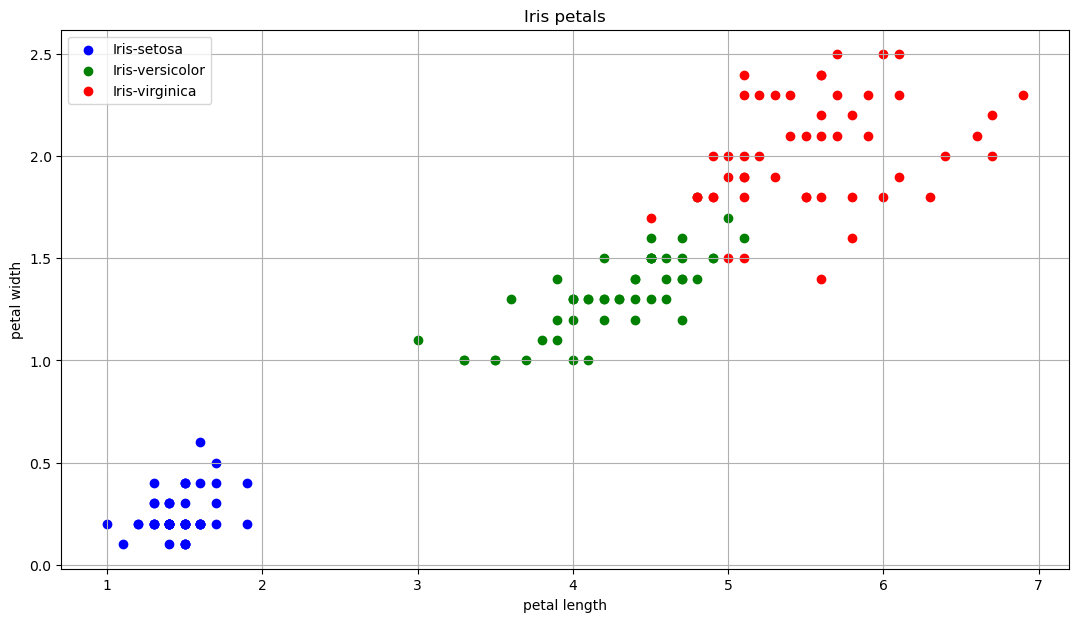

In [11]:
setosa = iris[iris.species == "Iris-setosa"]
versicolor = iris[iris.species=='Iris-versicolor']
virginica = iris[iris.species=='Iris-virginica']

fig, ax = plt.subplots()
fig.set_size_inches(13, 7) # adjusting the length and width of plot

# lables and scatter points
ax.scatter(setosa['petal_length'], setosa['petal_width'], label="Iris-setosa", facecolor="blue")
ax.scatter(versicolor['petal_length'], versicolor['petal_width'], label="Iris-versicolor", facecolor="green")
ax.scatter(virginica['petal_length'], virginica['petal_width'], label="Iris-virginica", facecolor="red")

ax.set_xlabel("petal length")
ax.set_ylabel("petal width")
ax.grid()
ax.set_title("Iris petals")
ax.legend()

Split dataset in training and testing data

In [69]:
X = iris.drop(['sepal_length', 'sepal_width', 'target', 'species'], axis=1)
y = iris.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.55, random_state=42)

Choosing the right kernel

In [67]:
#check the accuracy of the SVC classifier using different kernels

kernels = ['linear', 'rbf', 'poly']

for kernel in kernels:
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train) #trains the model
    pred = model.predict(X_test) #does prediction
    print("Accuracy using {}:".format(kernel), accuracy_score(pred, y_test))

Accuracy using linear: 1.0
Accuracy using rbf: 1.0
Accuracy using poly: 1.0


c:\Users\Mulle\anaconda3\envs\py38\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


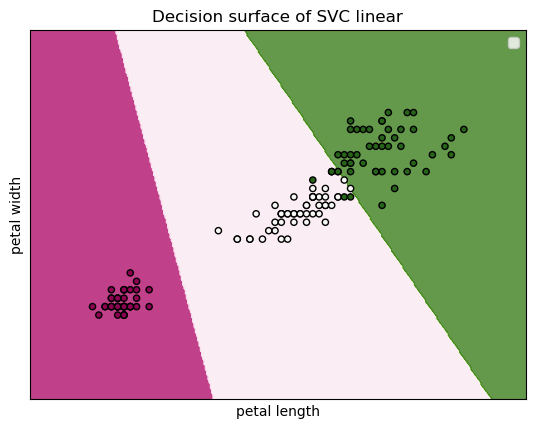

c:\Users\Mulle\anaconda3\envs\py38\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


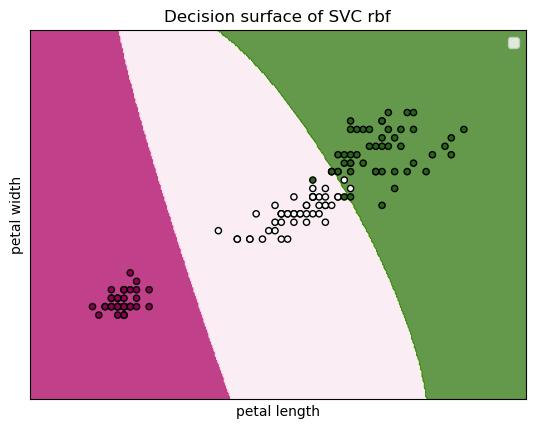

c:\Users\Mulle\anaconda3\envs\py38\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


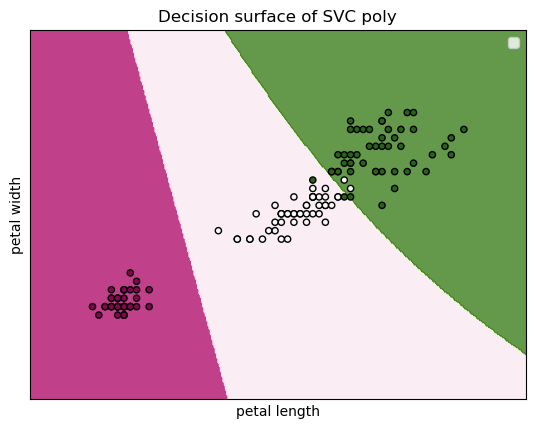

In [70]:
def make_meshgrid(x, y, h=.02): #Create a mesh of points to plot in
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), #Return evenly spaced values within a given interval h
                          np.arange(y_min, y_max, h)) #Return a list of coordinate matrices from coordinate vectors.
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.
    
    Parameters
    ----------
        ax: matplotlib axes object
        clf: a classifier (kernel)
        xx: meshgrid ndarray
        yy: meshgrid ndarray
        params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

kernels = ['linear', 'rbf', 'poly']

for kernel in kernels:
    model = SVC(kernel=kernel)
    """mapping data points to a high-dimensional space 
    and then finding the optimal hyperplane that divides the data into two classes"""
    model.fit(X_train, y_train) #trains the model
    
    #Defining the plots
    fig, ax = plt.subplots()
    title = ('Decision surface of SVC ' + model.kernel)
    
    # Set-up grid for plotting.
    X0, X1 = X["petal_length"], X["petal_width"]
    xx, yy = make_meshgrid(X0, X1)

    #Plotting the data
    plot_contours(ax, model, xx, yy, cmap=plt.cm.PiYG, alpha=0.8) #Plots the colored areas corresponding to the decision surface of SVC (the model hyperplane)
    ax.scatter(X0, X1, 
                    c=y, #set the color to change according to y 
                    cmap=plt.cm.PiYG, #colors of the points
                    s=20, #size of the points
                    edgecolors='k') #color of the edge of the points (black)
    
    #Set graphic elements of the graph
    ax.set_xlabel("petal length")
    ax.set_ylabel("petal width")

    ax.set_xticks(()) #removes the graduation on x
    ax.set_yticks(()) #removes the graduation on y

    #Shows the elments of the graph
    ax.set_title(title)
    ax.legend()
    plt.show()

In [64]:
X = iris.drop(['sepal_length', 'sepal_width', 'species'], axis=1)
y = iris.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.55, random_state=42)

for kernel in kernels:
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train) #trains the model
    pred = model.predict(X_test) #does prediction
    test = pd.DataFrame()
    test["x_test"] = X_test["target"]
    test["output"] = pred

ValueError: Cannot set a DataFrame with multiple columns to the single column x_test